# Crime Prediction and Analysis

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import pandas as pd

# Loading the datasets
nypd_data_path = 'NYPD_Data_2003_Onwards.csv'
holiday_list_path = 'holiday_list.csv'
weather_data_path = 'nyc_temp_2003_2021.csv'

nypd_data = pd.read_csv(nypd_data_path)
holiday_list = pd.read_csv(holiday_list_path)
weather_data = pd.read_csv(weather_data_path)

In [3]:
#Displaying the first few rows of each dataset to understand their structure
nypd_data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column,Year
0,247853895,43.0,BRONX,2022-07-11,09:09:00,NaN,(null),COMPLETED,(null),NaN,...,UNKNOWN,UNKNOWN,D,1022682.0,242998.0,40.833567,-73.861118,"(40.833567, -73.861118)",POINT (-73.861118 40.833567),2022.0
1,250722124,67.0,BROOKLYN,2021-01-01,12:00:00,09/07/2022,12:00:00,COMPLETED,(null),NaN,...,<18,BLACK,F,997843.0,175671.0,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",POINT (-73.951016510623 40.6488507469884),2021.0
2,239511545,120.0,STATEN ISLAND,2021-12-24,08:00:00,01/03/2022,08:00:00,COMPLETED,(null),NaN,...,18-24,ASIAN / PACIFIC ISLANDER,M,960911.0,165085.0,40.619768,-74.084070,"(40.619768, -74.08407)",POINT (-74.08407 40.619768),2021.0
3,247992275,115.0,QUEENS,2015-06-15,00:01:00,07/13/2022,17:00:00,COMPLETED,(null),NaN,...,45-64,WHITE,M,1013677.0,212463.0,40.749791,-73.893792,"(40.749791, -73.893792)",POINT (-73.893792 40.749791),2015.0
4,239602232,75.0,BROOKLYN,2018-01-01,09:00:00,04/14/2021,23:59:00,COMPLETED,(null),NaN,...,65+,BLACK,M,1022153.0,184000.0,40.671636,-73.863359,"(40.671636, -73.863359)",POINT (-73.863359 40.671636),2018.0


In [4]:
holiday_list.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,7/4/2004,4th of July,Sunday,7,4,2004
1,7/4/2005,4th of July,Monday,7,4,2005
2,7/4/2006,4th of July,Tuesday,7,4,2006
3,7/4/2007,4th of July,Wednesday,7,4,2007
4,7/4/2008,4th of July,Friday,7,4,2008


In [5]:
weather_data.head()

,Unnamed: 0,MM/DD/YYYY,YEAR,MONTH,DAY,TMAX,TMIN
0,48935,2003-01-01,2003,1,1,100.0,22.0
1,48936,2003-01-02,2003,1,2,28.0,-17.0
2,48937,2003-01-03,2003,1,3,11.0,-17.0
3,48938,2003-01-04,2003,1,4,22.0,-6.0
4,48939,2003-01-05,2003,1,5,22.0,0.0


In [6]:
nypd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396775 entries, 0 to 396774
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                396775 non-null  object 
 1   ADDR_PCT_CD               396755 non-null  float64
 2   BORO_NM                   396775 non-null  object 
 3   CMPLNT_FR_DT              396775 non-null  object 
 4   CMPLNT_FR_TM              396775 non-null  object 
 5   CMPLNT_TO_DT              367409 non-null  object 
 6   CMPLNT_TO_TM              396775 non-null  object 
 7   CRM_ATPT_CPTD_CD          396775 non-null  object 
 8   HADEVELOPT                396775 non-null  object 
 9   HOUSING_PSA               25450 non-null   float64
 10  JURISDICTION_CODE         396775 non-null  int64  
 11  JURIS_DESC                396775 non-null  object 
 12  KY_CD                     396775 non-null  int64  
 13  LAW_CAT_CD                396775 non-null  o

In [7]:
holiday_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6699 non-null   int64  
 1   MM/DD/YYYY  6699 non-null   object 
 2   YEAR        6699 non-null   int64  
 3   MONTH       6699 non-null   int64  
 4   DAY         6699 non-null   int64  
 5   TMAX        6699 non-null   float64
 6   TMIN        6699 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 366.5+ KB


# Data Cleaning

In [9]:
# Drop unwanted columns
nypd_data.drop(["CMPLNT_TO_DT", "CMPLNT_TO_TM", "HADEVELOPT", "HOUSING_PSA", "JURISDICTION_CODE", "JURIS_DESC", "PARKS_NM", "PATROL_BORO", "PD_CD", "PD_DESC", "STATION_NAME", "TRANSIT_DISTRICT", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "Lat_Lon", "New Georeferenced Column"], axis=1, inplace=True )

In [10]:
# Rename Columns
nypd_data.rename(columns={"CMPLNT_NUM" : "Complaint_Id",
"ADDR_PCT_CD": "Neighborhood",
"BORO_NM": "Borough",	
"CMPLNT_FR_DT": "Start_Date",
"CMPLNT_FR_TM": "Start_Time",	
"CRM_ATPT_CPTD_CD": "Status",	
"KY_CD": "Offence_Code",	
"LAW_CAT_CD": "Offence_Category",	
"LOC_OF_OCCUR_DESC": "Offence_Location",	
"OFNS_DESC": "Offence_Type",
"PREM_TYP_DESC": "Offence_Location_Type",
"RPT_DT": "Reported_Date",
"SUSP_AGE_GROUP": "Suspect_Age",
"SUSP_RACE" : "Suspect_Race", 	
"SUSP_SEX": "Suspect_Sex",	
"VIC_AGE_GROUP": "Victim_Age",
"VIC_RACE": "Victim_Race",
"VIC_SEX": "Victim_Sex"}, inplace=True)

In [11]:
nypd_data

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year
0,247853895,43.0,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,2022.0
1,250722124,67.0,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F,2021.0
2,239511545,120.0,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,(null),(null),(null),18-24,ASIAN / PACIFIC ISLANDER,M,2021.0
3,247992275,115.0,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,(null),(null),(null),45-64,WHITE,M,2015.0
4,239602232,75.0,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,(null),(null),(null),65+,BLACK,M,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,251818673,46.0,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F,2022.0
396771,251891178,94.0,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,2022.0
396772,251788586,79.0,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E,2022.0
396773,251833912,70.0,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F,2022.0


In [12]:
nypd_data = nypd_data.replace('(null)', np.NaN)
nypd_data = nypd_data.replace('', np.NaN)

In [13]:
nypd_data

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year
0,247853895,43.0,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,2022.0
1,250722124,67.0,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F,2021.0
2,239511545,120.0,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,NaN,NaN,NaN,18-24,ASIAN / PACIFIC ISLANDER,M,2021.0
3,247992275,115.0,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,NaN,NaN,NaN,45-64,WHITE,M,2015.0
4,239602232,75.0,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,NaN,NaN,NaN,65+,BLACK,M,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,251818673,46.0,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F,2022.0
396771,251891178,94.0,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,2022.0
396772,251788586,79.0,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E,2022.0
396773,251833912,70.0,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F,2022.0


In [14]:
nypd_data.isnull().sum()

Complaint_Id                 0
Neighborhood                20
Borough                    657
Start_Date                   0
Start_Time                   0
Status                       0
Offence_Code                 0
Offence_Category             0
Offence_Location         66064
Offence_Type                 5
Offence_Location_Type      474
Reported_Date                0
Suspect_Age              73483
Suspect_Race             73483
Suspect_Sex              73483
Victim_Age                   0
Victim_Race                104
Victim_Sex                   0
Year                         0
dtype: int64

In [15]:
nypd_data['Neighborhood'] = nypd_data['Neighborhood'].fillna(0)
nypd_data['Borough'] = nypd_data['Borough'].fillna('UNKNOWN')
nypd_data.isnull().sum()

Complaint_Id                 0
Neighborhood                 0
Borough                      0
Start_Date                   0
Start_Time                   0
Status                       0
Offence_Code                 0
Offence_Category             0
Offence_Location         66064
Offence_Type                 5
Offence_Location_Type      474
Reported_Date                0
Suspect_Age              73483
Suspect_Race             73483
Suspect_Sex              73483
Victim_Age                   0
Victim_Race                104
Victim_Sex                   0
Year                         0
dtype: int64

In [16]:
nypd_data.update(nypd_data[["Offence_Location", "Offence_Type", "Offence_Location_Type", 
                            "Suspect_Race", "Victim_Race", "Suspect_Age", "Victim_Age"]].fillna("UNKNOWN"))

In [17]:
nypd_data['Suspect_Sex'] = nypd_data['Suspect_Sex'].fillna('U')

In [18]:
nypd_data

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year
0,247853895,43.0,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,2022.0
1,250722124,67.0,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F,2021.0
2,239511545,120.0,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,UNKNOWN,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,M,2021.0
3,247992275,115.0,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,UNKNOWN,UNKNOWN,U,45-64,WHITE,M,2015.0
4,239602232,75.0,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,251818673,46.0,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F,2022.0
396771,251891178,94.0,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,2022.0
396772,251788586,79.0,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E,2022.0
396773,251833912,70.0,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F,2022.0


In [19]:
nypd_data.isnull().sum()

Complaint_Id             0
Neighborhood             0
Borough                  0
Start_Date               0
Start_Time               0
Status                   0
Offence_Code             0
Offence_Category         0
Offence_Location         0
Offence_Type             0
Offence_Location_Type    0
Reported_Date            0
Suspect_Age              0
Suspect_Race             0
Suspect_Sex              0
Victim_Age               0
Victim_Race              0
Victim_Sex               0
Year                     0
dtype: int64

In [20]:
#Datatypes of the columns 
nypd_data.dtypes

Complaint_Id              object
Neighborhood             float64
Borough                   object
Start_Date                object
Start_Time                object
Status                    object
Offence_Code               int64
Offence_Category          object
Offence_Location          object
Offence_Type              object
Offence_Location_Type     object
Reported_Date             object
Suspect_Age               object
Suspect_Race              object
Suspect_Sex               object
Victim_Age                object
Victim_Race               object
Victim_Sex                object
Year                     float64
dtype: object

In [21]:
nypd_data[["Neighborhood"]] = nypd_data[["Neighborhood"]].astype("int64")
nypd_data.dtypes

Complaint_Id              object
Neighborhood               int64
Borough                   object
Start_Date                object
Start_Time                object
Status                    object
Offence_Code               int64
Offence_Category          object
Offence_Location          object
Offence_Type              object
Offence_Location_Type     object
Reported_Date             object
Suspect_Age               object
Suspect_Race              object
Suspect_Sex               object
Victim_Age                object
Victim_Race               object
Victim_Sex                object
Year                     float64
dtype: object

In [22]:
def update_date_format(dataframe, col_name, date_first):
  return np.where(
    dataframe[col_name].str.contains('/'), 
    pd.to_datetime(dataframe[col_name], errors = 'coerce'), 
    pd.to_datetime(dataframe[col_name], errors = 'coerce', dayfirst=date_first)
  )

nypd_data["Start_Date"] = update_date_format(nypd_data, "Start_Date", False)
nypd_data["Reported_Date"] = update_date_format(nypd_data, "Reported_Date", False)

nypd_data.dtypes

Complaint_Id                     object
Neighborhood                      int64
Borough                          object
Start_Date               datetime64[ns]
Start_Time                       object
Status                           object
Offence_Code                      int64
Offence_Category                 object
Offence_Location                 object
Offence_Type                     object
Offence_Location_Type            object
Reported_Date            datetime64[ns]
Suspect_Age                      object
Suspect_Race                     object
Suspect_Sex                      object
Victim_Age                       object
Victim_Race                      object
Victim_Sex                       object
Year                            float64
dtype: object

In [23]:
nypd_data = nypd_data.dropna(axis=0, subset=["Start_Date"])

In [24]:
#New Columns for start and reported year, month 

def create_year_month_cols(data_frame, col_name):
  return {
      "month": pd.DatetimeIndex(data_frame[col_name]).month, 
      "year": pd.DatetimeIndex(data_frame[col_name]).year
    }

start_year_month = create_year_month_cols(nypd_data, "Start_Date")
nypd_data["Start_Date_Month"] = start_year_month["month"]
nypd_data["Start_Date_Year"] = start_year_month["year"]

rep_year_month = create_year_month_cols(nypd_data, "Reported_Date")
nypd_data["Reported_Date_Month"] = rep_year_month["month"]
nypd_data["Reported_Date_Year"] = rep_year_month["year"]

nypd_data[["Complaint_Id", "Start_Date", "Reported_Date", "Start_Date_Month", "Start_Date_Year"]]

,Complaint_Id,Start_Date,Reported_Date,Start_Date_Month,Start_Date_Year
0,247853895,2022-07-11,2022-07-11,7,2022
1,250722124,2021-01-01,2022-09-07,1,2021
2,239511545,2021-12-24,2022-01-21,12,2021
3,247992275,2015-06-15,2022-07-13,6,2015
4,239602232,2018-01-01,2022-01-24,1,2018
...,...,...,...,...,...
396770,251818673,2022-09-29,2022-09-29,9,2022
396771,251891178,2022-09-30,2022-09-30,9,2022
396772,251788586,2022-09-29,2022-09-29,9,2022
396773,251833912,2022-09-30,2022-09-30,9,2022


In [25]:
nypd_data.drop_duplicates("Complaint_Id", inplace=True)

In [26]:
nypd_data

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year,Start_Date_Month,Start_Date_Year,Reported_Date_Month,Reported_Date_Year
0,247853895,43,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,...,BLACK,M,UNKNOWN,UNKNOWN,D,2022.0,7,2022,7,2022
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,UNKNOWN,U,<18,BLACK,F,2021.0,1,2021,9,2022
2,239511545,120,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,...,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,M,2021.0,12,2021,1,2022
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,UNKNOWN,U,45-64,WHITE,M,2015.0,6,2015,7,2022
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,UNKNOWN,U,65+,BLACK,M,2018.0,1,2018,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,251818673,46,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,...,UNKNOWN,U,UNKNOWN,UNKNOWN,F,2022.0,9,2022,9,2022
396771,251891178,94,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,...,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,2022.0,9,2022,9,2022
396772,251788586,79,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,...,BLACK,M,UNKNOWN,UNKNOWN,E,2022.0,9,2022,9,2022
396773,251833912,70,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,...,BLACK,M,65+,BLACK,F,2022.0,9,2022,9,2022


In [27]:
#Displaying basic info and summary statistics
print(nypd_data.info(), nypd_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396662 entries, 0 to 396774
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Complaint_Id           396662 non-null  object        
 1   Neighborhood           396662 non-null  int64         
 2   Borough                396662 non-null  object        
 3   Start_Date             396662 non-null  datetime64[ns]
 4   Start_Time             396662 non-null  object        
 5   Status                 396662 non-null  object        
 6   Offence_Code           396662 non-null  int64         
 7   Offence_Category       396662 non-null  object        
 8   Offence_Location       396662 non-null  object        
 9   Offence_Type           396662 non-null  object        
 10  Offence_Location_Type  396662 non-null  object        
 11  Reported_Date          396662 non-null  datetime64[ns]
 12  Suspect_Age            396662 non-null  obje

In [28]:
print(holiday_list.info(), holiday_list.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB
None             Month         Day         Year
count  342.000000  342.000000   342.000000
mean     7.263158   15.853801  2012.500000
std      3.899889    9.653330     5.195729
min      1.000000    1.000000  2004.000000
25%      4.000000    6.000000  2008.000000
50%      9.000000   16.500000  2012.500000
75%     11.000000   24.000000  2017.000000
max     12.000000   31.000000  2021.000000


In [29]:
print(weather_data.info(), weather_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6699 non-null   int64  
 1   MM/DD/YYYY  6699 non-null   object 
 2   YEAR        6699 non-null   int64  
 3   MONTH       6699 non-null   int64  
 4   DAY         6699 non-null   int64  
 5   TMAX        6699 non-null   float64
 6   TMIN        6699 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 366.5+ KB
None          Unnamed: 0         YEAR        MONTH          DAY         TMAX  \
count   6699.000000  6699.000000  6699.000000  6699.000000  6699.000000   
mean   52284.000000  2011.676220     6.449619    15.719063   170.595910   
std     1933.979059     5.297745     3.461854     8.802732   100.971882   
min    48935.000000  2003.000000     1.000000     1.000000  -105.000000   
25%    50609.500000  2007.000000     3.000000     8.000000    89.000000   
50%   

In [30]:
weather_data

,Unnamed: 0,MM/DD/YYYY,YEAR,MONTH,DAY,TMAX,TMIN
0,48935,2003-01-01,2003,1,1,100.0,22.0
1,48936,2003-01-02,2003,1,2,28.0,-17.0
2,48937,2003-01-03,2003,1,3,11.0,-17.0
3,48938,2003-01-04,2003,1,4,22.0,-6.0
4,48939,2003-01-05,2003,1,5,22.0,0.0
...,...,...,...,...,...,...,...
6694,55629,2021-04-30,2021,4,30,217.0,78.0
6695,55630,2021-05-01,2021,5,1,183.0,56.0
6696,55631,2021-05-02,2021,5,2,278.0,133.0
6697,55632,2021-05-03,2021,5,3,189.0,111.0


In [31]:
#Drop the 'Unnamed: 0' column from the weather_data DataFrame
weather_data.drop('Unnamed: 0', axis=1, inplace=True)


In [32]:
weather_data

,MM/DD/YYYY,YEAR,MONTH,DAY,TMAX,TMIN
0,2003-01-01,2003,1,1,100.0,22.0
1,2003-01-02,2003,1,2,28.0,-17.0
2,2003-01-03,2003,1,3,11.0,-17.0
3,2003-01-04,2003,1,4,22.0,-6.0
4,2003-01-05,2003,1,5,22.0,0.0
...,...,...,...,...,...,...
6694,2021-04-30,2021,4,30,217.0,78.0
6695,2021-05-01,2021,5,1,183.0,56.0
6696,2021-05-02,2021,5,2,278.0,133.0
6697,2021-05-03,2021,5,3,189.0,111.0


In [33]:
weather_data.rename(columns={"MM/DD/YYYY" : "Date"}, inplace=True)
weather_data

,Date,YEAR,MONTH,DAY,TMAX,TMIN
0,2003-01-01,2003,1,1,100.0,22.0
1,2003-01-02,2003,1,2,28.0,-17.0
2,2003-01-03,2003,1,3,11.0,-17.0
3,2003-01-04,2003,1,4,22.0,-6.0
4,2003-01-05,2003,1,5,22.0,0.0
...,...,...,...,...,...,...
6694,2021-04-30,2021,4,30,217.0,78.0
6695,2021-05-01,2021,5,1,183.0,56.0
6696,2021-05-02,2021,5,2,278.0,133.0
6697,2021-05-03,2021,5,3,189.0,111.0


In [34]:
#Converting 'Date' in weather_data to datetime if it's not already
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

In [35]:
#Calculating the average daily temperatures (TMAX and TMIN are in tenths of degrees Celsius)
weather_data['AVG_TEMP'] = (weather_data['TMAX'] + weather_data['TMIN']) / 20

In [36]:
#Merging NYPD data with weather data
nypd_weather_merged = pd.merge(nypd_data, weather_data, left_on='Start_Date', right_on='Date', how='left')

nypd_weather_merged

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Start_Date_Year,Reported_Date_Month,Reported_Date_Year,Date,YEAR,MONTH,DAY,TMAX,TMIN,AVG_TEMP
0,247853895,43,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,...,2022,7,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,2021,9,2022,2021-01-01,2021.0,1.0,1.0,44.0,6.0,2.50
2,239511545,120,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,...,2021,1,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,2015,7,2022,2015-06-15,2015.0,6.0,15.0,283.0,178.0,23.05
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,2018,1,2022,2018-01-01,2018.0,1.0,1.0,-71.0,-138.0,-10.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396657,251818673,46,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,...,2022,9,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
396658,251891178,94,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,...,2022,9,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
396659,251788586,79,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,...,2022,9,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
396660,251833912,70,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,...,2022,9,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
nypd_weather_merged = nypd_weather_merged.dropna(subset=['Date'])

In [38]:
nypd_weather_merged

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Start_Date_Year,Reported_Date_Month,Reported_Date_Year,Date,YEAR,MONTH,DAY,TMAX,TMIN,AVG_TEMP
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,2021,9,2022,2021-01-01,2021.0,1.0,1.0,44.0,6.0,2.50
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,2015,7,2022,2015-06-15,2015.0,6.0,15.0,283.0,178.0,23.05
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,2018,1,2022,2018-01-01,2018.0,1.0,1.0,-71.0,-138.0,-10.45
11,241896615,81,BROOKLYN,2021-01-01,12:00:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,2021,3,2022,2021-01-01,2021.0,1.0,1.0,44.0,6.0,2.50
16,241250409,69,BROOKLYN,2019-12-10,06:00:00,COMPLETED,341,MISDEMEANOR,UNKNOWN,PETIT LARCENY,...,2019,2,2022,2019-12-10,2019.0,12.0,10.0,144.0,39.0,9.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11342,240421526,72,BROOKLYN,2018-09-05,00:01:00,COMPLETED,116,FELONY,INSIDE,SEX CRIMES,...,2018,2,2022,2018-09-05,2018.0,9.0,5.0,317.0,250.0,28.35
11343,241066094,115,QUEENS,2020-01-31,00:01:00,COMPLETED,340,MISDEMEANOR,INSIDE,FRAUDS,...,2020,2,2022,2020-01-31,2020.0,1.0,31.0,67.0,6.0,3.65
11344,250345660,107,QUEENS,2020-09-01,02:00:00,COMPLETED,105,FELONY,UNKNOWN,ROBBERY,...,2020,8,2022,2020-09-01,2020.0,9.0,1.0,250.0,189.0,21.95
11350,249734218,114,QUEENS,2018-06-05,00:00:00,COMPLETED,115,FELONY,INSIDE,PROSTITUTION & RELATED OFFENSES,...,2018,8,2022,2018-06-05,2018.0,6.0,5.0,239.0,144.0,19.15


In [39]:
#Checking if a day is a holiday
nypd_weather_merged = nypd_weather_merged.copy()
nypd_weather_merged['Is_Holiday'] = nypd_weather_merged['Start_Date'].isin(holiday_list['Date'])

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the get_season function to create a 'Season' column
nypd_weather_merged['Season'] = nypd_weather_merged['Start_Date_Month'].apply(get_season)

# Group by Season and Offense Category
seasonal_offense_counts=nypd_weather_merged.groupby(['Season','Offence_Category']).size().reset_index(name='Crime_Count')


In [60]:
nypd_weather_merged

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Reported_Date_Year,Date,YEAR,MONTH,DAY,TMAX,TMIN,AVG_TEMP,Is_Holiday,Season
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,2022,2021-01-01,2021.0,1.0,1.0,44.0,6.0,2.50,1,Winter
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,2022,2015-06-15,2015.0,6.0,15.0,283.0,178.0,23.05,0,Summer
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,2022,2018-01-01,2018.0,1.0,1.0,-71.0,-138.0,-10.45,1,Winter
11,241896615,81,BROOKLYN,2021-01-01,12:00:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,2022,2021-01-01,2021.0,1.0,1.0,44.0,6.0,2.50,1,Winter
16,241250409,69,BROOKLYN,2019-12-10,06:00:00,COMPLETED,341,MISDEMEANOR,UNKNOWN,PETIT LARCENY,...,2022,2019-12-10,2019.0,12.0,10.0,144.0,39.0,9.15,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11342,240421526,72,BROOKLYN,2018-09-05,00:01:00,COMPLETED,116,FELONY,INSIDE,SEX CRIMES,...,2022,2018-09-05,2018.0,9.0,5.0,317.0,250.0,28.35,0,Fall
11343,241066094,115,QUEENS,2020-01-31,00:01:00,COMPLETED,340,MISDEMEANOR,INSIDE,FRAUDS,...,2022,2020-01-31,2020.0,1.0,31.0,67.0,6.0,3.65,0,Winter
11344,250345660,107,QUEENS,2020-09-01,02:00:00,COMPLETED,105,FELONY,UNKNOWN,ROBBERY,...,2022,2020-09-01,2020.0,9.0,1.0,250.0,189.0,21.95,0,Fall
11350,249734218,114,QUEENS,2018-06-05,00:00:00,COMPLETED,115,FELONY,INSIDE,PROSTITUTION & RELATED OFFENSES,...,2022,2018-06-05,2018.0,6.0,5.0,239.0,144.0,19.15,0,Summer


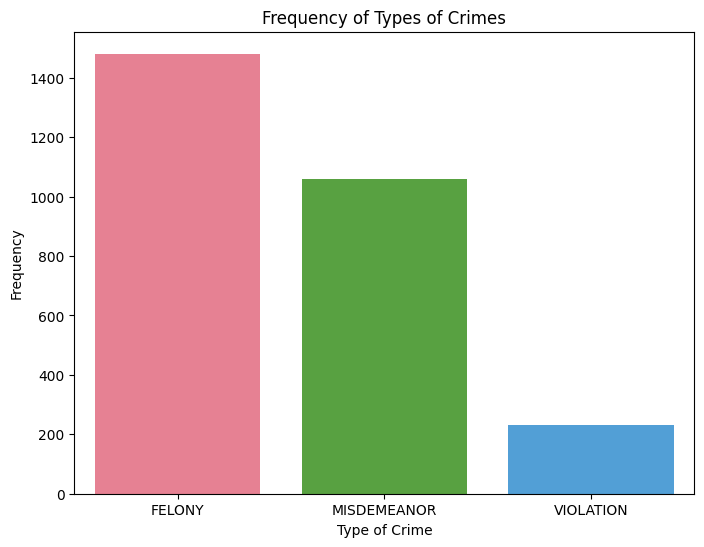

In [43]:

# Assuming your DataFrame is named nypd_weather_merged and the column for crime types is 'Offence_Category'
# Count the number of occurrences of each crime type
crime_counts = nypd_weather_merged['Offence_Category'].value_counts()

custom_palette = sns.color_palette("husl", len(crime_counts))

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=crime_counts.index, y=crime_counts.values, hue=crime_counts.index, palette=custom_palette, legend=False)
plt.title('Frequency of Types of Crimes')
plt.xlabel('Type of Crime')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)  
plt.show()

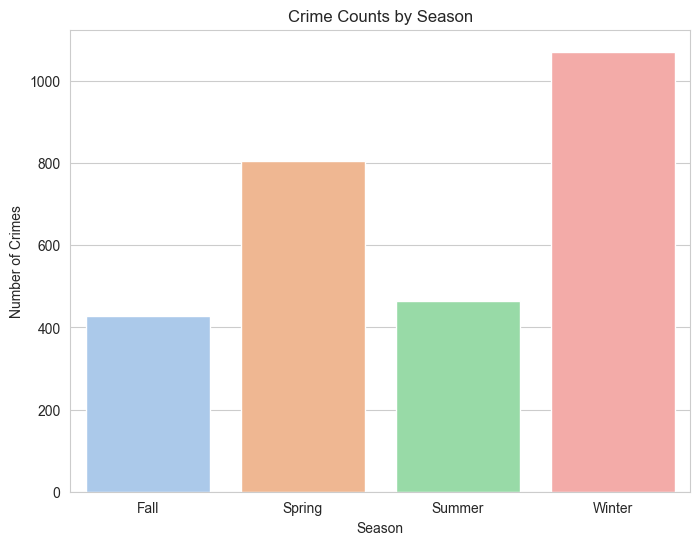

In [44]:
# Assuming 'nypd_weather_merged' has the necessary data
seasonal_crime_counts = nypd_weather_merged.groupby('Season').size().reset_index(name='Crime_Count')

# Plotting Crime Counts by Season
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal_crime_counts, x='Season', y='Crime_Count', hue='Season', palette='pastel', legend=False)
plt.title('Crime Counts by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.show()


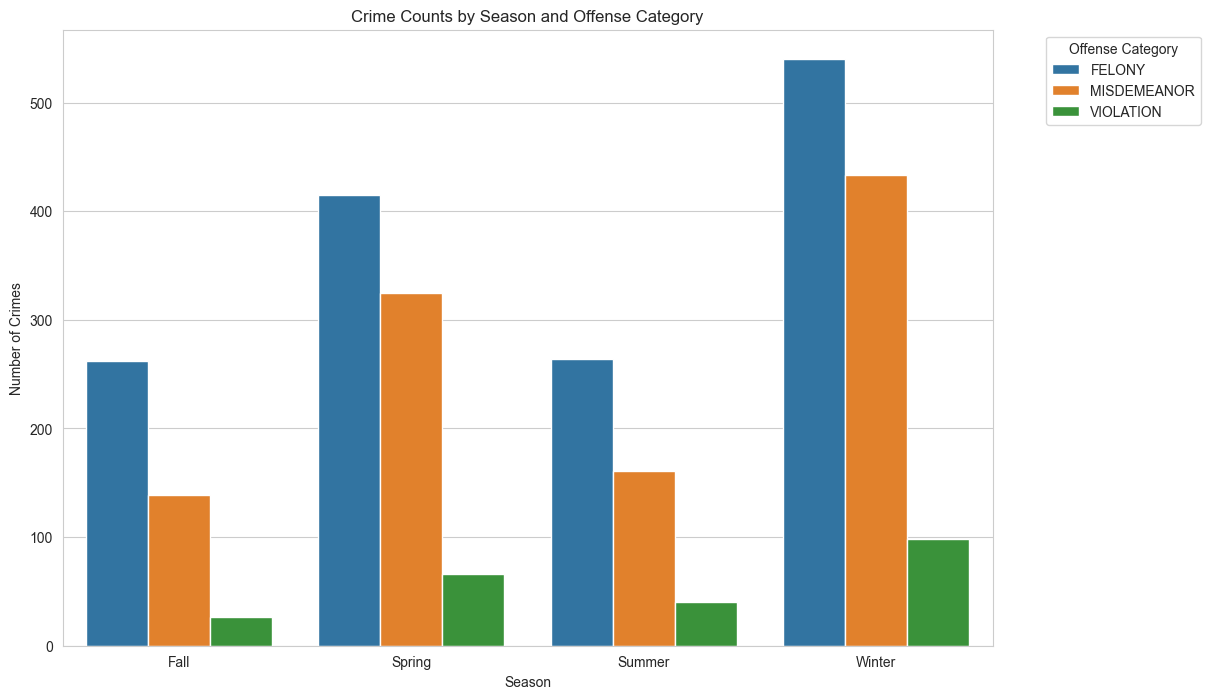

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'seasonal_offense_counts' DataFrame from the previous steps

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=seasonal_offense_counts, x='Season', y='Crime_Count', hue='Offence_Category')
plt.title('Crime Counts by Season and Offense Category')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.legend(title='Offense Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


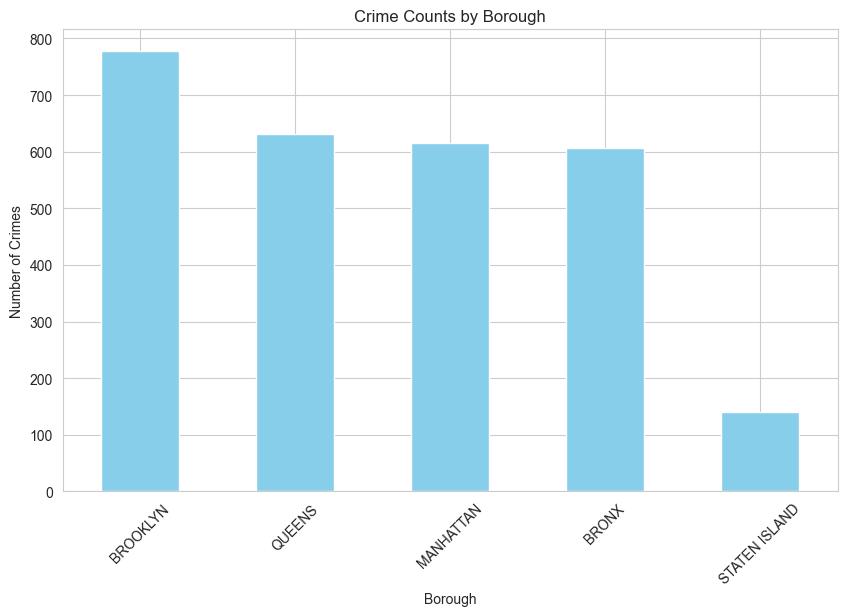

In [46]:
import matplotlib.pyplot as plt

# Assuming 'nypd_weather_merged' contains the necessary columns including 'Borough' and 'Complaint_Id'
borough_counts = nypd_weather_merged['Borough'].value_counts()

#Crime counts by Borough

plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='skyblue')
plt.title('Crime Counts by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


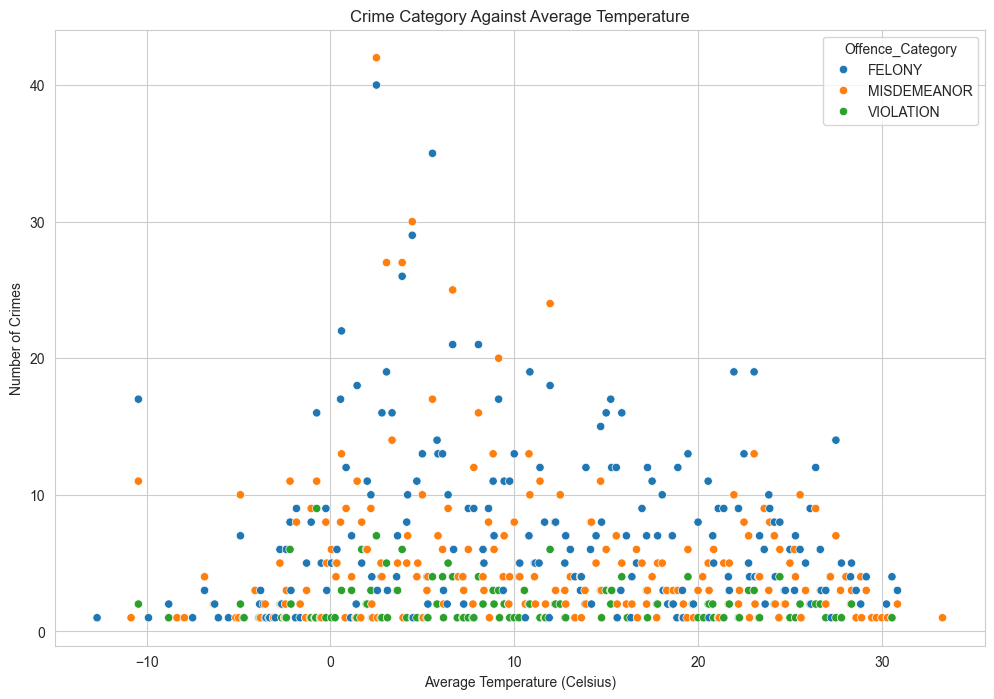

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named nypd_weather_merged
# Aggregate the data
agg_data = nypd_weather_merged.groupby(['AVG_TEMP', 'Offence_Category']).size().reset_index(name='Crime_Count')

# Checking if agg_data is created successfully
if 'agg_data' in locals():
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=agg_data, x='AVG_TEMP', y='Crime_Count', hue='Offence_Category')
    plt.title('Crime Category Against Average Temperature')
    plt.xlabel('Average Temperature (Celsius)')
    plt.ylabel('Number of Crimes')
    plt.show()
else:
    print("Aggregated data not created. Please check the previous steps.")


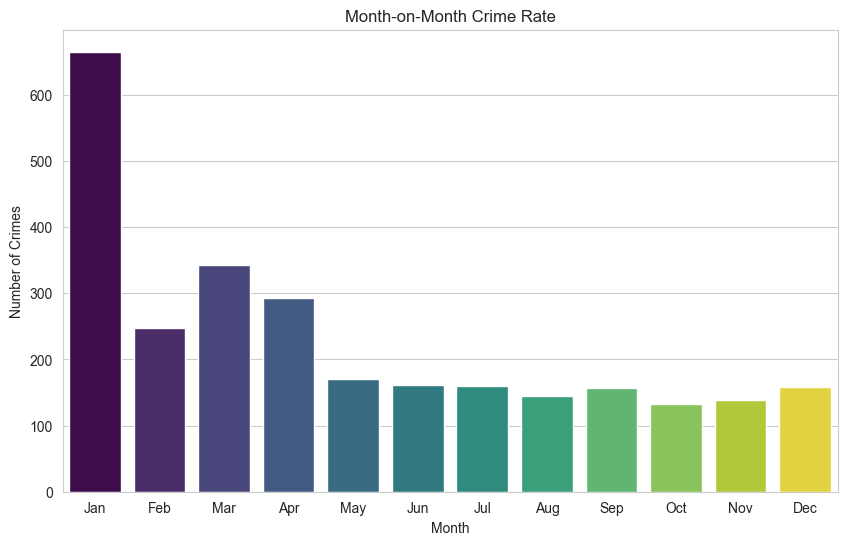

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the data by month
monthly_crime_counts = nypd_weather_merged['Start_Date_Month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_crime_counts.index, y=monthly_crime_counts.values, hue=monthly_crime_counts.index,
            palette="viridis", legend=False)
plt.title('Month-on-Month Crime Rate')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                       'Oct', 'Nov', 'Dec'])
plt.show()

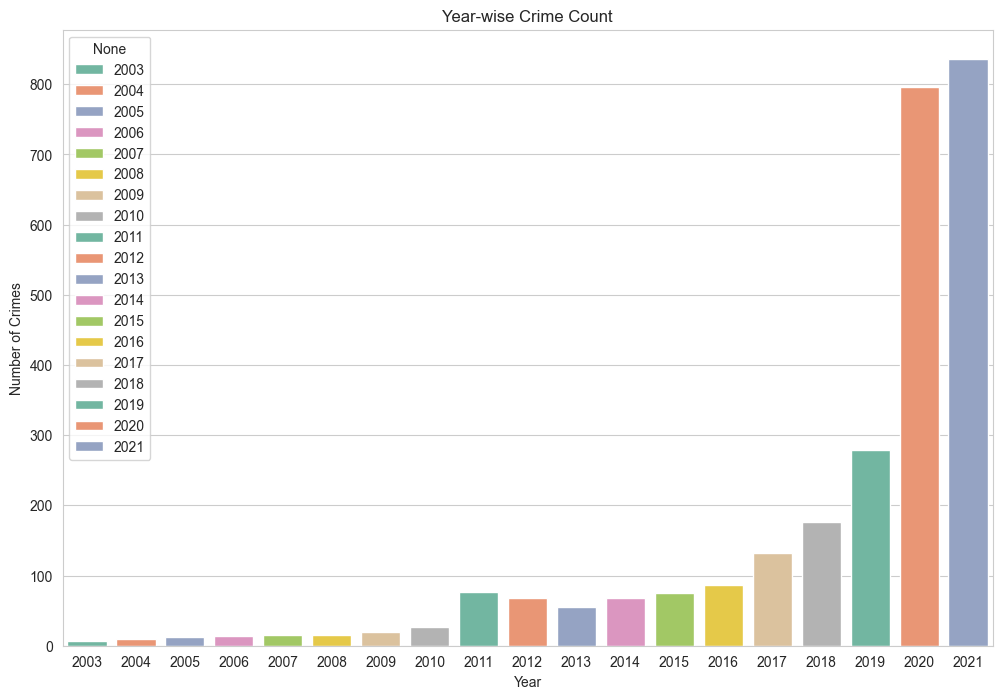

In [50]:
# Aggregate the data by year and crime status
yearly_crime_counts = nypd_weather_merged['Start_Date_Year'].value_counts().sort_index()
#nypd_weather_merged.groupby(['Start_Date_Year', 'Status']).size().reset_index(name='Crime_Count')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=yearly_crime_counts.index, y=yearly_crime_counts.values, hue=yearly_crime_counts.index, palette='Set2')
plt.title('Year-wise Crime Count')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


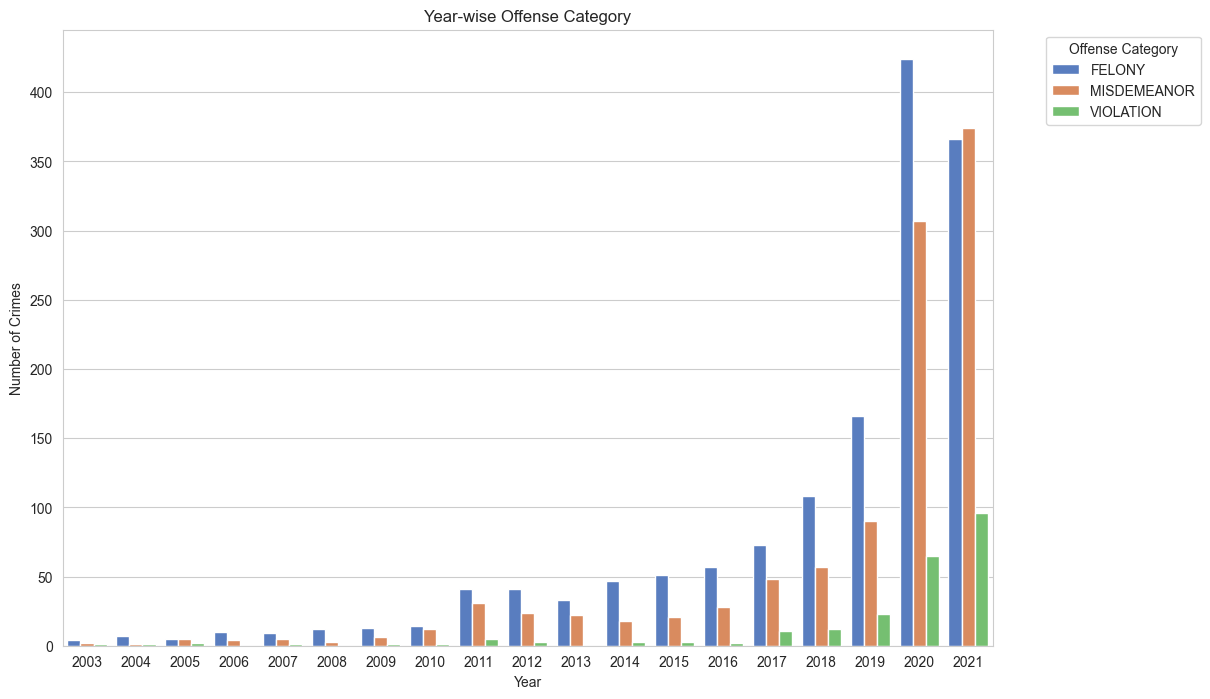

In [51]:
# Aggregate the data by year and offense category
yearly_offense_category = nypd_weather_merged.groupby(['Start_Date_Year', 'Offence_Category']).size().reset_index(name='Crime_Count')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=yearly_offense_category, x='Start_Date_Year', y='Crime_Count', hue='Offence_Category', palette='muted')
plt.title('Year-wise Offense Category')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Offense Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Model Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Classification Report
print(classification_report(y_test, y_pred_gb))

# Feature Importance
feature_importance_gb = pd.DataFrame({'Feature': X.columns, 'Importance': gb_classifier.feature_importances_})
feature_importance_gb.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_gb)


Gradient Boosting Accuracy: 0.5487364620938628
              precision    recall  f1-score   support

      FELONY       0.60      0.75      0.67       316
 MISDEMEANOR       0.42      0.34      0.37       198
   VIOLATION       0.50      0.03      0.05        40

    accuracy                           0.55       554
   macro avg       0.51      0.37      0.36       554
weighted avg       0.53      0.55      0.52       554

                  Feature  Importance
3                AVG_TEMP    0.299391
0            Neighborhood    0.268096
2         Start_Date_Year    0.197500
1        Start_Date_Month    0.125245
4           Borough_BRONX    0.043484
5        Borough_BROOKLYN    0.028971
9            Is_Holiday_0    0.010872
6       Borough_MANHATTAN    0.009463
10           Is_Holiday_1    0.006824
7          Borough_QUEENS    0.006477
8   Borough_STATEN ISLAND    0.003676
